# GAMLSS

Generalized additive models for location scale and shape (GAMLSS) models facilitate modelling additional
parameters of the response distribution (such as a scale parameter), as a function of the explanatory variables.
an explanatory variable. Below is a simple 1D example:

In [ ]:
from pymgcv.terms import Smooth as S
from pymgcv.gam import GAM

import matplotlib.pyplot as plt

# Create toy dataset
import pandas as pd
import numpy as np

rng = np.random.default_rng(0)
x = np.linspace(-1, 1, 100)
data = pd.DataFrame({
    "x": x,
    "y": rng.normal(loc=np.pi*np.sin(4*x), scale=4*np.abs(x) + 0.1)
})

We use the "gaulss()" family, which supports modelling the log standard deviation

In [ ]:
model = GAM(
    response_predictors={"y": S("x")},
    other_predictors={"log_scale": S("x")},
    family="gaulss()",
)

fitted_model = model.fit(data=data)
fit_and_se = fitted_model.predict(data)

,fit,se
0,6.121798,1.473362
1,5.663459,1.345445
2,5.205462,1.223870
3,4.748370,1.110843
4,4.292987,1.008700


This gives us a dictionary of targets (response/family parameters), and the fitted values and standard errors, e.g.

In [11]:
print(fit_and_se["y"].head())

        fit        se
0  6.121798  1.473362
1  5.663459  1.345445
2  5.205462  1.223870
3  4.748370  1.110843
4  4.292987  1.008700


Plotting the predictions

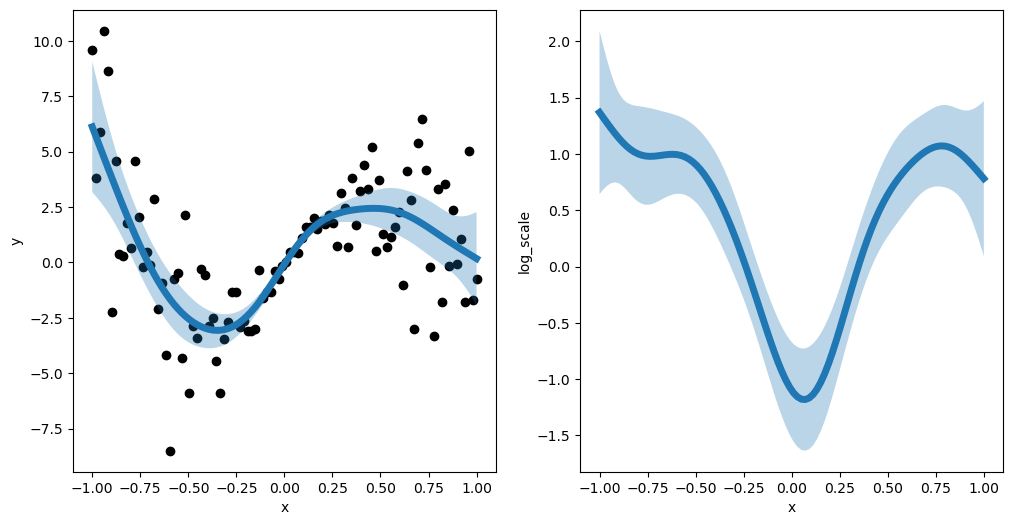

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

axes[0].scatter(
        data["x"],
        data["y"],
        color="black"
    ) 
for ax, (target, fit) in zip(axes, fit_and_se.items()):

    ax.plot(
        data["x"],
        fit["fit"],
        linewidth=5,
    )
    ax.fill_between(
        data["x"],
        fit["fit"] + 2 * fit["se"],
        fit["fit"] - 2 * fit["se"],
        alpha=0.3,
    )
    ax.set_ylabel(target)
    ax.set_xlabel("x")